In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from pycorrcat.pycorrcat import plot_corr, corr_matrix
from sklearn.linear_model import LogisticRegression #This is for logistic regression
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,roc_curve,roc_auc_score #Metrics for classification
from imblearn.over_sampling import SMOTE,ADASYN
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis #LDA,QDA
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler

In [2]:
#import pip
#pip.main(["install","xgboost"])

In [3]:
#import pip
#pip.main(["install","pycorr"])

In [4]:
df=pd.read_csv("C:\\Users\\User\\Desktop\\Final Project\\healthcare-dataset-stroke-data.CSV")

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df_new=df.drop("id",axis=1) # Since enrolle_id is meaningless feature, it is removed from the dataframe 
df_new.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
df_new.duplicated().sum() # Are there any duplicated rows? 

0

In [8]:
len(df_new)

5110

In [9]:
x=df_new.iloc[:,:10] #upto the 12 without 12
y=df_new.iloc[:,10]

In [10]:
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


In [11]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
x_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3029,Female,36.0,0,0,Yes,Private,Rural,67.29,36.7,formerly smoked
2277,Female,34.0,0,0,Yes,Private,Rural,83.53,48.5,formerly smoked
3002,Male,60.0,0,0,Yes,Private,Rural,65.16,30.8,never smoked
246,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked
2825,Male,76.0,0,0,Yes,Private,Urban,58.65,25.6,smokes



# Data Cleaning


In [14]:
x_train.isna().any() # Are there any missing values in each coloumn?

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
dtype: bool

In [15]:
y_train.isna().any()

False

In [16]:
x_train.isna().sum() # No of missing values in each coloumn

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  160
smoking_status         0
dtype: int64

In [17]:
x_test.isna().any() 

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
dtype: bool

In [18]:
y_test.isna().any()

False

## train to category

In [19]:
x_train.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
dtype: object

In [20]:
y_train.dtypes

dtype('int64')

In [21]:
x_train = x_train.astype({"gender":'category',"hypertension":'category',"heart_disease":'category',"ever_married":'category',"work_type":'category',"Residence_type":'category',"smoking_status":'category'})

In [22]:
x_train.dtypes

gender               category
age                   float64
hypertension         category
heart_disease        category
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
dtype: object

In [23]:
y_train = y_train.astype({"stroke":'category'})

In [24]:
y_train.dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

## test to category

In [25]:
x_test.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
dtype: object

In [26]:
y_test.dtypes

dtype('int64')

In [27]:
x_test = x_test.astype({"gender":'category',"hypertension":'category',"heart_disease":'category',"ever_married":'category',"work_type":'category',"Residence_type":'category',"smoking_status":'category'})

In [28]:
x_test.dtypes

gender               category
age                   float64
hypertension         category
heart_disease        category
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
dtype: object

In [29]:
y_test = y_test.astype({"stroke":'category'})

In [30]:
y_test.dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

In [31]:
x_train.skew(axis = 0, skipna = True)

age                 -0.151072
avg_glucose_level    1.556805
bmi                  1.140338
dtype: float64

In [32]:
# Since the skewness of "bmi" is greater than 0, we use "median" for the imputation 

In [33]:
x_train['bmi'].median()

28.0

In [34]:
x_train['bmi'].fillna(28.0,inplace=True)

In [35]:
x_test['bmi'].fillna(28.0,inplace=True)

In [36]:
x_train.isna().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
dtype: bool

In [37]:
x_test.isna().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
dtype: bool

In [38]:
trainDataSet = pd.concat([x_train, y_train], axis=1)

In [39]:
trainDataSet.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3029,Female,36.0,0,0,Yes,Private,Rural,67.29,36.7,formerly smoked,0
2277,Female,34.0,0,0,Yes,Private,Rural,83.53,48.5,formerly smoked,0
3002,Male,60.0,0,0,Yes,Private,Rural,65.16,30.8,never smoked,0
246,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
2825,Male,76.0,0,0,Yes,Private,Urban,58.65,25.6,smokes,0


In [40]:
testDataSet = pd.concat([x_test, y_test], axis=1)

In [41]:
testDataSet.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
42,Male,82.0,0,1,Yes,Private,Urban,144.90,26.4,smokes,1
380,Male,4.0,0,0,No,children,Rural,106.22,16.7,Unknown,0
3524,Male,58.0,0,0,Yes,Private,Urban,79.95,25.9,never smoked,0
352,Female,20.0,0,0,No,Private,Rural,96.57,34.1,never smoked,0
4927,Female,10.0,0,0,No,children,Rural,69.84,13.7,Unknown,0


In [42]:
trainDataSet.to_csv("trainDataSetFINAL.csv")

In [43]:
testDataSet.to_csv("testDataSetFINAL.csv")

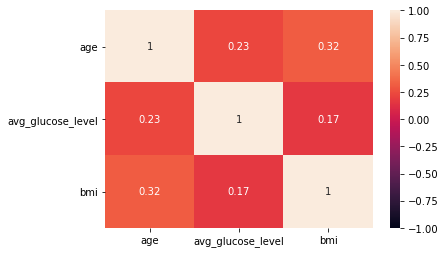

In [44]:
sns.heatmap(trainDataSet.corr(),vmin=-1,vmax=1,annot=True)
plt.show()

In [45]:
#Correlation plot for continuous data is done by using R  

## Label encoding

In [46]:
x_train.dtypes

gender               category
age                   float64
hypertension         category
heart_disease        category
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
dtype: object

In [55]:
le=LabelEncoder()
le

LabelEncoder()

In [56]:
x_train[['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']]=x_train[['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']].apply(lambda col:le.fit_transform(col))

In [57]:
x_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3029,0,36.0,0,0,1,2,0,67.29,36.7,1
2277,0,34.0,0,0,1,2,0,83.53,48.5,1
3002,1,60.0,0,0,1,2,0,65.16,30.8,2
246,0,75.0,0,0,1,3,0,78.80,29.3,1
2825,1,76.0,0,0,1,2,1,58.65,25.6,3


In [58]:
x_test[['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']]=x_test[['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']].apply(lambda col:le.fit_transform(col))

In [59]:
x_test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
42,1,82.0,0,1,1,2,1,144.90,26.4,3
380,1,4.0,0,0,0,4,0,106.22,16.7,0
3524,1,58.0,0,0,1,2,1,79.95,25.9,2
352,0,20.0,0,0,0,2,0,96.57,34.1,2
4927,0,10.0,0,0,0,4,0,69.84,13.7,0


In [48]:
x_train.gender.value_counts()

Female    2405
Male      1682
Other        1
Name: gender, dtype: int64

In [60]:
x_train.gender.value_counts()

0    2405
1    1682
2       1
Name: gender, dtype: int64

In [49]:
x_train.hypertension.value_counts()

0    3682
1     406
Name: hypertension, dtype: int64

In [61]:
x_train.hypertension.value_counts()

0    3682
1     406
Name: hypertension, dtype: int64

In [50]:
x_train.heart_disease.value_counts()

0    3866
1     222
Name: heart_disease, dtype: int64

In [62]:
x_train.heart_disease.value_counts()

0    3866
1     222
Name: heart_disease, dtype: int64

In [51]:
x_train.ever_married.value_counts()

Yes    2696
No     1392
Name: ever_married, dtype: int64

In [63]:
x_train.ever_married.value_counts()

1    2696
0    1392
Name: ever_married, dtype: int64

In [52]:
x_train.work_type.value_counts()

Private          2322
Self-employed     658
children          548
Govt_job          546
Never_worked       14
Name: work_type, dtype: int64

In [64]:
x_train.work_type.value_counts()

2    2322
3     658
4     548
0     546
1      14
Name: work_type, dtype: int64

In [53]:
x_train.Residence_type.value_counts()

Urban    2085
Rural    2003
Name: Residence_type, dtype: int64

In [65]:
x_train.Residence_type.value_counts()

1    2085
0    2003
Name: Residence_type, dtype: int64

In [54]:
x_train.smoking_status.value_counts()

never smoked       1510
Unknown            1229
formerly smoked     712
smokes              637
Name: smoking_status, dtype: int64

In [66]:
x_train.smoking_status.value_counts()

2    1510
0    1229
1     712
3     637
Name: smoking_status, dtype: int64

In [ ]:
#x_train_new=pd.get_dummies(x_train[['gender','hypertension','heart_disease','ever_married','work_type','Residence_type',
#                              'smoking_status']],drop_first=True)
#x_train_new.head()

In [ ]:
#x_test_new=pd.get_dummies(x_test[['gender','hypertension','heart_disease','ever_married','work_type','Residence_type',
#                              'smoking_status']],drop_first=True)
#x_test_new.head()

In [ ]:
#x_train_new.shape

In [ ]:
#x_test_new.shape

In [ ]:
# Get missing columns in the training test
#missing_cols = set( x_train_new.columns ) - set( x_test_new.columns )
#missing_cols

In [ ]:
#x_test_new= x_test_new.reindex(columns = x_train_new.columns, fill_value=0)

In [ ]:
#missing_cols = set( x_train_new.columns ) - set( x_test_new.columns )
#missing_cols

In [67]:
x_train.shape

(4088, 10)

In [68]:
x_test.shape

(1022, 10)

In [69]:
y_train.value_counts()

0    3893
1     195
Name: stroke, dtype: int64

# Performing SMOTE

In [ ]:
smt=SMOTE()

In [ ]:
x_sm,y_sm=smt.fit_resample(x_train_new,y_train)

In [ ]:
y_sm.value_counts()

# Over sampling (SMOTE)

## 1) Logistic

In [ ]:
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=CV, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_sm,y_sm)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
lr = LogisticRegression(C=100,penalty='l2',solver='lbfgs')
lr.fit(x_sm,y_sm)

## 2)Ridge

In [ ]:
params = {"alpha":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
model = RidgeClassifier()
CV = KFold(n_splits=10,shuffle=True)

In [ ]:
gsearch = GridSearchCV(model, params,cv=CV)

In [ ]:
results = gsearch.fit(x_sm, y_sm)

In [ ]:
results.best_params_

In [ ]:
rr = RidgeClassifier(alpha=0.1)
rr.fit(x_sm, y_sm)

## 3)Bagging

In [ ]:
# define models and parameters
model = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=CV, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_sm,y_sm)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
bag = BaggingClassifier(n_estimators=100)
bag.fit(x_sm, y_sm)

## 4)Random Forest

In [ ]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_sm,y_sm)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
rf = RandomForestClassifier(max_features= 'sqrt', n_estimators= 100)
rf.fit(x_sm, y_sm)

## 5)KNN

In [ ]:
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(5)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=CV, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_sm,y_sm)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3,weights='distance',metric='euclidean')
knn.fit(x_sm, y_sm)

## 6)SVM

In [ ]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_sm, y_sm)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
SVM = SVC(C= 50, gamma='scale', kernel= 'rbf')
SVM.fit(x_sm, y_sm)

## 7)GradientBoosting

In [ ]:
# define models and parameters
model = GradientBoostingClassifier()
n_estimators = [10, 100]
learning_rate = [0.01, 0.1]
subsample = [0.5, 1.0]
max_depth = [3, 7]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=CV, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_sm, y_sm)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
gradrg=GradientBoostingClassifier(learning_rate = 0.1, max_depth = 7, n_estimators = 100, subsample = 0.5)
gradrg.fit(x_sm, y_sm)

## 9)LDA

In [ ]:
# define models and parameters
model = LinearDiscriminantAnalysis()
solver = ['svd', 'lsqr', 'eigen']
shrinkage = ['auto','None']
# define grid search
grid = dict(solver=solver, shrinkage=shrinkage)
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=CV, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_sm, y_sm)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
lda=LinearDiscriminantAnalysis(shrinkage = 'auto', solver = 'lsqr')
lda.fit(x_sm, y_sm)

In [ ]:
def get_performances(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y.round())
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

In [ ]:
pred_Y_lr = lr.predict(x_test_new) # predicts the Y given the fitted model Logistic Regression
pred_Y_rr = rr.predict(x_test_new) # predicts the Y given the fitted model Ridge Regression
pred_Y_bag = bag.predict(x_test_new) # predicts the Y given the fitted model Bagging
pred_Y_rf = rf.predict(x_test_new) # predicts the Y given the fitted model Random Forest
pred_Y_knn = knn.predict(x_test_new) # predicts the Y given the fitted model KNN
pred_Y_svm = SVM.predict(x_test_new) # predicts the Y given the fitted model Support Vector Machines
pred_Y_gradrg = gradrg.predict(x_test_new) # predicts the Y given the fitted model Gradient Boosting
pred_Y_lda = lda.predict(x_test_new) # predicts the Y given the fitted model LDA

In [ ]:
# accuracy, sensitivity, and specificity for model Random Forest
accuracy_lr, sensitivity_lr, specificity_lr = get_performances(y_test, pred_Y_lr)

# accuracy, sensitivity, and specificity for model Random Forest
accuracy_rr, sensitivity_rr, specificity_rr = get_performances(y_test, pred_Y_rr)

# accuracy, sensitivity, and specificity for model Random Forest
accuracy_bag, sensitivity_bag, specificity_bag = get_performances(y_test, pred_Y_bag)

# accuracy, sensitivity, and specificity for model Random Forest
accuracy_rf, sensitivity_rf, specificity_rf = get_performances(y_test, pred_Y_rf)

# accuracy, sensitivity, and specificity for model KNN
accuracy_knn, sensitivity_knn, specificity_knn = get_performances(y_test, pred_Y_knn)

# accuracy, sensitivity, and specificity for model Support Vector Machines
accuracy_svm, sensitivity_svm, specificity_svm = get_performances(y_test, pred_Y_svm)

# accuracy, sensitivity, and specificity for model Gradient Boosting
accuracy_gradrg, sensitivity_gradrg, specificity_gradrg = get_performances(y_test, pred_Y_gradrg)

# accuracy, sensitivity, and specificity for model LDA
accuracy_lda, sensitivity_lda, specificity_lda = get_performances(y_test, pred_Y_lda)

In [ ]:
perf = pd.DataFrame([accuracy_lr,accuracy_rr,accuracy_bag,accuracy_rf,accuracy_knn,accuracy_svm,accuracy_gradrg,accuracy_lda], 
                    columns = ['Accuracy'], 
                    index = ['Logistic Regression','Ridge Regression','Bagging','Random Forest','KNN','Support Vector Machine','Gradient Boosting','LDA'])

perf['Sensitivity'] = np.asarray([sensitivity_lr,sensitivity_rr,sensitivity_bag,sensitivity_rf,
                                  sensitivity_knn,sensitivity_svm,sensitivity_gradrg,sensitivity_lda])

perf['Specificity'] = np.asarray([specificity_lr,specificity_rr,specificity_bag,specificity_rf,
                                  specificity_knn,specificity_svm,specificity_gradrg,specificity_lda])
perf

# Without re-sampling (SMOTE)

## 1) Logistic

In [ ]:
lr = LogisticRegression(C=100,penalty='l2',solver='newton-cg')
lr.fit(x_train_new,y_train)

## 2) Ridge

In [ ]:
rr = RidgeClassifier(alpha=0.7)
rr.fit(x_train_new,y_train)

## 3)Bagging

In [ ]:
bag = BaggingClassifier()
bag.fit(x_train_new,y_train)

## 4)Rndom Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf.fit(x_train_new,y_train)

## 5)KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train_new,y_train)

## 6)SVM

In [ ]:
SVM = svm.LinearSVC()
SVM.fit(x_train_new,y_train)

## 7)Gradient Boosting

In [ ]:
gradrg=GradientBoostingClassifier()
gradrg.fit(x_train_new,y_train)

## 8)LDA

In [ ]:
lda=LinearDiscriminantAnalysis()
lda.fit(x_train_new,y_train)

In [ ]:
def get_performances(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y.round())
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

In [ ]:
pred_Y_lr = lr.predict(x_test_new) # predicts the Y given the fitted model Logistic Regression
pred_Y_rr = rr.predict(x_test_new) # predicts the Y given the fitted model Ridge Regression
pred_Y_bag = bag.predict(x_test_new) # predicts the Y given the fitted model Bagging
pred_Y_rf = rf.predict(x_test_new) # predicts the Y given the fitted model Random Forest
pred_Y_knn = knn.predict(x_test_new) # predicts the Y given the fitted model KNN
pred_Y_svm = SVM.predict(x_test_new) # predicts the Y given the fitted model Support Vector Machines
pred_Y_gradrg = gradrg.predict(x_test_new) # predicts the Y given the fitted model Gradient Boosting
pred_Y_lda = lda.predict(x_test_new) # predicts the Y given the fitted model LDA

In [ ]:
# accuracy, sensitivity, and specificity for model Logistic Regression
accuracy_lr, sensitivity_lr, specificity_lr = get_performances(y_test, pred_Y_lr)

# accuracy, sensitivity, and specificity for model Random Ridge Regression
accuracy_rr, sensitivity_rr, specificity_rr = get_performances(y_test, pred_Y_rr)

# accuracy, sensitivity, and specificity for model Random Bagging
accuracy_bag, sensitivity_bag, specificity_bag = get_performances(y_test, pred_Y_bag)

# accuracy, sensitivity, and specificity for model Random Forest
accuracy_rf, sensitivity_rf, specificity_rf = get_performances(y_test, pred_Y_rf)

# accuracy, sensitivity, and specificity for model KNN
accuracy_knn, sensitivity_knn, specificity_knn = get_performances(y_test, pred_Y_knn)

# accuracy, sensitivity, and specificity for model Support Vector Machines
accuracy_svm, sensitivity_svm, specificity_svm = get_performances(y_test, pred_Y_svm)

# accuracy, sensitivity, and specificity for model Gradient Boosting
accuracy_gradrg, sensitivity_gradrg, specificity_gradrg = get_performances(y_test, pred_Y_gradrg)

# accuracy, sensitivity, and specificity for model LDA
accuracy_lda, sensitivity_lda, specificity_lda = get_performances(y_test, pred_Y_lda)


In [ ]:
perf = pd.DataFrame([accuracy_lr,accuracy_rr,accuracy_bag,accuracy_rf,accuracy_knn,accuracy_svm,accuracy_gradrg,accuracy_lda], 
                    columns = ['Accuracy'], 
                    index = ['Logistic Regression','Ridge Regression','Bagging','Random Forest','KNN','Support Vector Machine','Gradient Boosting','LDA'])

perf['Sensitivity'] = np.asarray([sensitivity_lr,sensitivity_rr,sensitivity_bag,sensitivity_rf,
                                  sensitivity_knn,sensitivity_svm,sensitivity_gradrg,sensitivity_lda])

perf['Specificity'] = np.asarray([specificity_lr,specificity_rr,specificity_bag,specificity_rf,
                                  specificity_knn,specificity_svm,specificity_gradrg,specificity_lda])
perf

# -----------------------------------------------------------------------------------------------------------

# Random Under Sampling

In [70]:
# instantiating the random undersampler
rus = RandomUnderSampler() 
# resampling X, y
x_rus, y_rus = rus.fit_resample(x_train,y_train)

## 1)Logistic

In [ ]:
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=CV, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_rus, y_rus)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
lr = LogisticRegression(C=0.01,penalty='l2',solver='liblinear',random_state=1)
lr.fit(x_rus,y_rus)

## 2)Ridge

In [ ]:
params = {"alpha":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
model = RidgeClassifier()
CV = KFold(n_splits=10,shuffle=True)

In [ ]:
gsearch = GridSearchCV(model, params,cv=CV)

In [ ]:
results = gsearch.fit(x_rus,y_rus)

In [ ]:
results.best_params_

In [ ]:
rr = RidgeClassifier(alpha=0.7,random_state=1)
rr.fit(x_rus, y_rus)

## 3)Bagging

In [ ]:
# define models and parameters
model = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=CV, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_rus,y_rus)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
bag = BaggingClassifier(n_estimators = 1000,random_state=1)
bag.fit(x_rus, y_rus)

## 4)Random Forest

In [ ]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_rus, y_rus)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, max_features = 'log2',random_state=1)
rf.fit(x_rus, y_rus)

In [ ]:
pred_Y_rf = rf.predict(x_test_new)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_test, pred_Y_rf)
a=auc(fpr,tpr)
print("Area under the curve:",a)

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % a)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
confusion_matrixrf = confusion_matrix(y_test, pred_Y_rf)
print(confusion_matrixrf)

## 5)KNN

In [ ]:
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(5)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=CV, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_rus, y_rus)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
knn = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 3, weights = 'uniform')
knn.fit(x_rus, y_rus)

In [ ]:
pred_Y_knn = knn.predict(x_test_new)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, pred_Y_knn)
a=auc(fpr,tpr)
print("Area under the curve:",a)

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % a)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
confusion_matrixknn = confusion_matrix(y_test, pred_Y_knn)
print(confusion_matrixknn)

## 6)SVM

In [ ]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_rus, y_rus)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
SVM = SVC(C= 1.0, gamma='scale', kernel= 'rbf',random_state=1)
SVM.fit(x_rus, y_rus)

In [ ]:
import joblib

In [ ]:
filename = "C:\\Users\\User\\Desktop\\Data Analysis 1\\finalized_model.sav"

In [ ]:
joblib.dump(SVM, filename)

## 7)GradientBoosting

In [ ]:
# define models and parameters
model = GradientBoostingClassifier()
n_estimators = [10, 100]
learning_rate = [0.01, 0.1]
subsample = [0.5, 1.0]
max_depth = [3, 7]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=CV, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_rus, y_rus)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [71]:
gradrg=GradientBoostingClassifier(learning_rate = 0.01, max_depth = 3, n_estimators = 100, subsample = 0.5,random_state=1)
gradrg.fit(x_rus, y_rus)

GradientBoostingClassifier(learning_rate=0.01, random_state=1, subsample=0.5)

### saving the model

In [72]:
import pickle

In [73]:
filename = "C:\\Users\\User\\Desktop\\Final Project\\final_model.pkl"
pickle.dump(gradrg, open(filename, 'wb'))

### loading the model

In [74]:
loaded_model=pickle.load(open(filename, 'rb'))

In [75]:
loaded_model.predict(x_test)

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [76]:
loaded_model.predict_proba(x_test)

array([[0.32955841, 0.67044159],
       [0.80250515, 0.19749485],
       [0.52667309, 0.47332691],
       ...,
       [0.49991164, 0.50008836],
       [0.29519085, 0.70480915],
       [0.77145057, 0.22854943]])

In [77]:
loaded_model.predict_proba(x_test)[:,1]

array([0.67044159, 0.19749485, 0.47332691, ..., 0.50008836, 0.70480915,
       0.22854943])

### testing

In [80]:
testing_values=[[1,82,0,1,1,2,1,144.9,26.4,3]]

In [81]:
loaded_model.predict_proba(testing_values)[:,1]

array([0.67044159])

In [82]:
testing_values=[[1,34,0,0,1,2,0,83.53,48.5,1]]

In [83]:
loaded_model.predict_proba(testing_values)[:,1]

array([0.31271592])

## 8)LDA

In [ ]:
# define models and parameters
model = LinearDiscriminantAnalysis()
solver = ['svd', 'lsqr', 'eigen']
shrinkage = ['auto','None']
# define grid search
grid = dict(solver=solver, shrinkage=shrinkage)
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=CV, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_rus, y_rus)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
lda=LinearDiscriminantAnalysis(shrinkage = 'auto', solver = 'lsqr')
lda.fit(x_rus,y_rus)

In [ ]:
def get_performances(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y.round())
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

In [ ]:
pred_Y_lr = lr.predict(x_test_new) # predicts the Y given the fitted model Logistic Regression
pred_Y_rr = rr.predict(x_test_new) # predicts the Y given the fitted model Ridge Regression
pred_Y_bag = bag.predict(x_test_new) # predicts the Y given the fitted model Bagging
pred_Y_rf = rf.predict(x_test_new) # predicts the Y given the fitted model Random Forest
pred_Y_knn = knn.predict(x_test_new) # predicts the Y given the fitted model KNN
pred_Y_svm = SVM.predict(x_test_new) # predicts the Y given the fitted model Support Vector Machines
pred_Y_gradrg = gradrg.predict(x_test_new) # predicts the Y given the fitted model Gradient Boosting
pred_Y_lda = lda.predict(x_test_new) # predicts the Y given the fitted model LDA

In [ ]:
# accuracy, sensitivity, and specificity for model Logistic Regression
accuracy_lr, sensitivity_lr, specificity_lr = get_performances(y_test, pred_Y_lr)

# accuracy, sensitivity, and specificity for model Random Ridge Regression
accuracy_rr, sensitivity_rr, specificity_rr = get_performances(y_test, pred_Y_rr)

# accuracy, sensitivity, and specificity for model Random Bagging
accuracy_bag, sensitivity_bag, specificity_bag = get_performances(y_test, pred_Y_bag)

# accuracy, sensitivity, and specificity for model Random Forest
accuracy_rf, sensitivity_rf, specificity_rf = get_performances(y_test, pred_Y_rf)

# accuracy, sensitivity, and specificity for model KNN
accuracy_knn, sensitivity_knn, specificity_knn = get_performances(y_test, pred_Y_knn)

# accuracy, sensitivity, and specificity for model Support Vector Machines
accuracy_svm, sensitivity_svm, specificity_svm = get_performances(y_test, pred_Y_svm)

# accuracy, sensitivity, and specificity for model Gradient Boosting
accuracy_gradrg, sensitivity_gradrg, specificity_gradrg = get_performances(y_test, pred_Y_gradrg)

# accuracy, sensitivity, and specificity for model LDA
accuracy_lda, sensitivity_lda, specificity_lda = get_performances(y_test, pred_Y_lda)


In [ ]:
perf = pd.DataFrame([accuracy_lr,accuracy_rr,accuracy_bag,accuracy_rf,accuracy_knn,accuracy_svm,accuracy_gradrg,accuracy_lda], 
                    columns = ['Accuracy'], 
                    index = ['Logistic Regression','Ridge Regression','Bagging','Random Forest','KNN','Support Vector Machine','Gradient Boosting','LDA'])

perf['Sensitivity'] = np.asarray([sensitivity_lr,sensitivity_rr,sensitivity_bag,sensitivity_rf,
                                  sensitivity_knn,sensitivity_svm,sensitivity_gradrg,sensitivity_lda])

perf['Specificity'] = np.asarray([specificity_lr,specificity_rr,specificity_bag,specificity_rf,
                                  specificity_knn,specificity_svm,specificity_gradrg,specificity_lda])
perf

# -----------------------------------------------------------------------------------------------------------

# SMOTE + Under sampling

In [ ]:
from imblearn.pipeline import Pipeline
# define pipeline
over = SMOTE(sampling_strategy=0.6, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.9, random_state=42)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
x_smun, y_smun = pipeline.fit_resample(x_train_new,y_train)

## 1)Logistic

In [ ]:
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=CV, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_smun, y_smun)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
lr = LogisticRegression(C=1,penalty='l2',solver='newton-cg')
lr.fit(x_smun, y_smun)

## 2)Ridge

In [ ]:
params = {"alpha":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
model = RidgeClassifier()
CV = KFold(n_splits=10,shuffle=True)

In [ ]:
gsearch = GridSearchCV(model, params,cv=CV)

In [ ]:
results = gsearch.fit(x_smun, y_smun)

In [ ]:
results.best_params_

In [ ]:
rr = RidgeClassifier(alpha=0.1)
rr.fit(x_smun, y_smun)

## 3)Bagging

In [ ]:
# define models and parameters
model = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=CV, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_smun, y_smun)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
bag = BaggingClassifier(n_estimators = 1000)
bag.fit(x_smun, y_smun)

## 4)Random Forest

In [ ]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_smun, y_smun)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, max_features = 'log2')
rf.fit(x_smun, y_smun)

## 5)KNN

In [ ]:
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(5)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=CV, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_smun, y_smun)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
knn = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 3, weights = 'distance')
knn.fit(x_smun, y_smun)

## 6)SVM

In [ ]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_smun, y_smun)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
SVM = SVC(C= 50, gamma='scale', kernel= 'rbf')
SVM.fit(x_smun, y_smun)

## 7)Gradient Boosting

In [ ]:
# define models and parameters
model = GradientBoostingClassifier()
n_estimators = [10, 100]
learning_rate = [0.01, 0.1]
subsample = [0.5, 1.0]
max_depth = [3, 7]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=CV, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_smun, y_smun)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
gradrg=GradientBoostingClassifier(learning_rate = 0.1, max_depth = 7, n_estimators = 100, subsample = 0.5)
gradrg.fit(x_smun, y_smun)

## 8)LDA

In [ ]:
# define models and parameters
model = LinearDiscriminantAnalysis()
solver = ['svd', 'lsqr', 'eigen']
shrinkage = ['auto','None']
# define grid search
grid = dict(solver=solver, shrinkage=shrinkage)
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=CV, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_smun, y_smun)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
lda=LinearDiscriminantAnalysis(shrinkage = 'auto', solver = 'lsqr')
lda.fit(x_smun, y_smun)

In [ ]:
def get_performances(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y.round())
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

In [ ]:
pred_Y_lr = lr.predict(x_test_new) # predicts the Y given the fitted model Logistic Regression
pred_Y_rr = rr.predict(x_test_new) # predicts the Y given the fitted model Ridge Regression
pred_Y_bag = bag.predict(x_test_new) # predicts the Y given the fitted model Bagging
pred_Y_rf = rf.predict(x_test_new) # predicts the Y given the fitted model Random Forest
pred_Y_knn = knn.predict(x_test_new) # predicts the Y given the fitted model KNN
pred_Y_svm = SVM.predict(x_test_new) # predicts the Y given the fitted model Support Vector Machines
pred_Y_gradrg = gradrg.predict(x_test_new) # predicts the Y given the fitted model Gradient Boosting
pred_Y_lda = lda.predict(x_test_new) # predicts the Y given the fitted model LDA

In [ ]:
# accuracy, sensitivity, and specificity for model Logistic Regression
accuracy_lr, sensitivity_lr, specificity_lr = get_performances(y_test, pred_Y_lr)

# accuracy, sensitivity, and specificity for model Random Ridge Regression
accuracy_rr, sensitivity_rr, specificity_rr = get_performances(y_test, pred_Y_rr)

# accuracy, sensitivity, and specificity for model Random Bagging
accuracy_bag, sensitivity_bag, specificity_bag = get_performances(y_test, pred_Y_bag)

# accuracy, sensitivity, and specificity for model Random Forest
accuracy_rf, sensitivity_rf, specificity_rf = get_performances(y_test, pred_Y_rf)

# accuracy, sensitivity, and specificity for model KNN
accuracy_knn, sensitivity_knn, specificity_knn = get_performances(y_test, pred_Y_knn)

# accuracy, sensitivity, and specificity for model Support Vector Machines
accuracy_svm, sensitivity_svm, specificity_svm = get_performances(y_test, pred_Y_svm)

# accuracy, sensitivity, and specificity for model Gradient Boosting
accuracy_gradrg, sensitivity_gradrg, specificity_gradrg = get_performances(y_test, pred_Y_gradrg)

# accuracy, sensitivity, and specificity for model LDA
accuracy_lda, sensitivity_lda, specificity_lda = get_performances(y_test, pred_Y_lda)

In [ ]:
perf = pd.DataFrame([accuracy_lr,accuracy_rr,accuracy_bag,accuracy_rf,accuracy_knn,accuracy_svm,accuracy_gradrg,accuracy_lda], 
                    columns = ['Accuracy'], 
                    index = ['Logistic Regression','Ridge Regression','Bagging','Random Forest','KNN','Support Vector Machine','Gradient Boosting','LDA'])

perf['Sensitivity'] = np.asarray([sensitivity_lr,sensitivity_rr,sensitivity_bag,sensitivity_rf,
                                  sensitivity_knn,sensitivity_svm,sensitivity_gradrg,sensitivity_lda])

perf['Specificity'] = np.asarray([specificity_lr,specificity_rr,specificity_bag,specificity_rf,
                                  specificity_knn,specificity_svm,specificity_gradrg,specificity_lda])
perf

# Random Over Sampling

In [ ]:
# instantiating the random over sampler 
ros = RandomOverSampler()
# resampling X, y
x_ros, y_ros = ros.fit_resample(x_train_new,y_train)

## 1)Logistic

In [ ]:
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=CV, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_ros, y_ros)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
lr = LogisticRegression(C=0.01,penalty='l2',solver='liblinear')
lr.fit(x_smun, y_smun)

## 2)Ridge

In [ ]:
params = {"alpha":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
model = RidgeClassifier()
CV = KFold(n_splits=10,shuffle=True)

In [ ]:
gsearch = GridSearchCV(model, params,cv=CV)

In [ ]:
results = gsearch.fit(x_ros, y_ros)

In [ ]:
results.best_params_

In [ ]:
rr = RidgeClassifier(alpha=0.1)
rr.fit(x_ros, y_ros)

## 3)Bagging

In [ ]:
# define models and parameters
model = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=CV, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_ros, y_ros)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
bag = BaggingClassifier(n_estimators = 10)
bag.fit(x_ros, y_ros)

## 4)Random Forest

In [ ]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_ros, y_ros)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
rf = RandomForestClassifier(n_estimators=10, max_depth=5, max_features = 'sqrt')
rf.fit(x_ros, y_ros)

## 5)KNN

In [ ]:
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(5)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=CV, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_ros, y_ros)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
knn = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 3, weights = 'distance')
knn.fit(x_ros, y_ros)

## 6)SVM

In [ ]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_ros, y_ros)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
SVM = SVC(C= 50, gamma='scale', kernel= 'rbf')
SVM.fit(x_ros, y_ros)

## 7)Gradient Boosting

In [ ]:
# define models and parameters
model = GradientBoostingClassifier()
n_estimators = [10, 100]
learning_rate = [0.01, 0.1]
subsample = [0.5, 1.0]
max_depth = [3, 7]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=CV, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_ros, y_ros)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
gradrg=GradientBoostingClassifier(learning_rate = 0.1, max_depth = 7, n_estimators = 100, subsample = 0.5)
gradrg.fit(x_ros, y_ros)

## 8)LDA

In [ ]:
# define models and parameters
model = LinearDiscriminantAnalysis()
solver = ['svd', 'lsqr', 'eigen']
shrinkage = ['auto','None']
# define grid search
grid = dict(solver=solver, shrinkage=shrinkage)
CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=CV, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_ros, y_ros)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
lda=LinearDiscriminantAnalysis(shrinkage = 'auto', solver = 'lsqr')
lda.fit(x_ros, y_ros)

In [ ]:
def get_performances(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y.round())
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

In [ ]:
pred_Y_lr = lr.predict(x_test_new) # predicts the Y given the fitted model Logistic Regression
pred_Y_rr = rr.predict(x_test_new) # predicts the Y given the fitted model Ridge Regression
pred_Y_bag = bag.predict(x_test_new) # predicts the Y given the fitted model Bagging
pred_Y_rf = rf.predict(x_test_new) # predicts the Y given the fitted model Random Forest
pred_Y_knn = knn.predict(x_test_new) # predicts the Y given the fitted model KNN
pred_Y_svm = SVM.predict(x_test_new) # predicts the Y given the fitted model Support Vector Machines
pred_Y_gradrg = gradrg.predict(x_test_new) # predicts the Y given the fitted model Gradient Boosting
pred_Y_lda = lda.predict(x_test_new) # predicts the Y given the fitted model LDA

In [ ]:
# accuracy, sensitivity, and specificity for model Logistic Regression
accuracy_lr, sensitivity_lr, specificity_lr = get_performances(y_test, pred_Y_lr)

# accuracy, sensitivity, and specificity for model Random Ridge Regression
accuracy_rr, sensitivity_rr, specificity_rr = get_performances(y_test, pred_Y_rr)

# accuracy, sensitivity, and specificity for model Random Bagging
accuracy_bag, sensitivity_bag, specificity_bag = get_performances(y_test, pred_Y_bag)

# accuracy, sensitivity, and specificity for model Random Forest
accuracy_rf, sensitivity_rf, specificity_rf = get_performances(y_test, pred_Y_rf)

# accuracy, sensitivity, and specificity for model KNN
accuracy_knn, sensitivity_knn, specificity_knn = get_performances(y_test, pred_Y_knn)

# accuracy, sensitivity, and specificity for model Support Vector Machines
accuracy_svm, sensitivity_svm, specificity_svm = get_performances(y_test, pred_Y_svm)

# accuracy, sensitivity, and specificity for model Gradient Boosting
accuracy_gradrg, sensitivity_gradrg, specificity_gradrg = get_performances(y_test, pred_Y_gradrg)

# accuracy, sensitivity, and specificity for model LDA
accuracy_lda, sensitivity_lda, specificity_lda = get_performances(y_test, pred_Y_lda)

In [ ]:
perf = pd.DataFrame([accuracy_lr,accuracy_rr,accuracy_bag,accuracy_rf,accuracy_knn,accuracy_svm,accuracy_gradrg,accuracy_lda], 
                    columns = ['Accuracy'], 
                    index = ['Logistic Regression','Ridge Regression','Bagging','Random Forest','KNN','Support Vector Machine','Gradient Boosting','LDA'])

perf['Sensitivity'] = np.asarray([sensitivity_lr,sensitivity_rr,sensitivity_bag,sensitivity_rf,
                                  sensitivity_knn,sensitivity_svm,sensitivity_gradrg,sensitivity_lda])

perf['Specificity'] = np.asarray([specificity_lr,specificity_rr,specificity_bag,specificity_rf,
                                  specificity_knn,specificity_svm,specificity_gradrg,specificity_lda])
perf